1. Створити не менше двох об’єктів TimeSeries, у яких індекси створені за 
допомогою date_range(). Виділити підмасиви у цих об’єктів.

In [1]:
from datetime import datetime
from dateutil import parser
import pandas as pd

date_range = pd.date_range('2022-11-25', periods=11, freq='Y')
date_range

time_serie = pd.Series(['1_element','2_element','3_element','4_element','5_element','6_element','7_element','8_element','9_element','10_element','11_element'], 
                        index=date_range)
time_serie.index.name = 'Date'
time_serie.loc['2024':'2029']

temporary_serie = pd.Series(['100', '200', '300'], index=pd.date_range('2022-11-25', periods=3, freq='M'))
time_serie_2 = pd.DataFrame(temporary_serie, columns=['Quantity'])
time_serie_2.index.name = 'Date'
time_serie_2

time_serie_2.loc['2022-11':'2022-12']

,Quantity
Date,
2022-11-30,100
2022-12-31,200


1. Побудувати графік зміни кількості біткоінів в обігу: а) загальний; б) 
за 2017 рік; в) за квітень 2016 року; г) за лютий 2010 – грудень 2015; 
д) за 2011 та 2015 на одному графіку.

а) загальний

In [2]:
import datetime

dataset = pd.DataFrame(pd.read_csv('BChain.csv'))

dataset.head(1000)
#TODO: change name on 'Unnamed: 0' column or Detele it

dates_array = dataset['Date']
dates_parsed =[]
for date in dates_array:
    dates_parsed.append(datetime.datetime.strptime(date, '%d-%b-%y').strftime('%Y-%m-%d'))

# print(dates_parsed)
dataset.index = dates_parsed
dataset.index.name = 'Date_Index'
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)
dataset.index
        


DatetimeIndex(['2009-01-03', '2009-01-05', '2009-01-07', '2009-01-09',
               '2009-01-11', '2009-01-13', '2009-01-15', '2009-01-17',
               '2009-01-19', '2009-01-21',
               ...
               '2018-08-30', '2018-09-01', '2018-09-03', '2018-09-05',
               '2018-09-07', '2018-09-09', '2018-09-11', '2018-09-13',
               '2018-09-15', '2018-09-17'],
              dtype='datetime64[ns]', name='Date_Index', length=1773, freq=None)

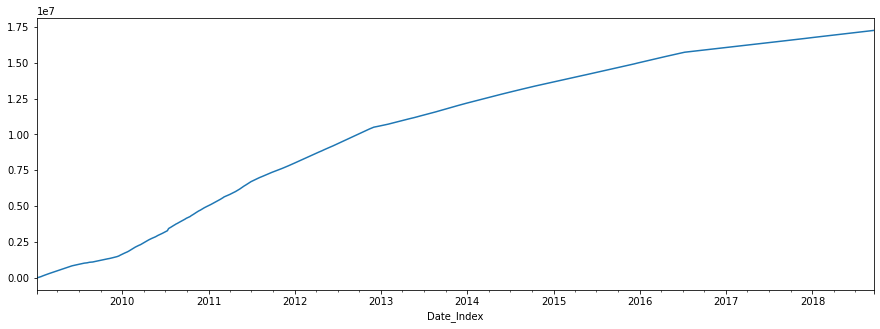

In [3]:
import seaborn as sns
# dataset['Bitcoins_in_circulation'].plot()
# sns.histplot(data = dataset, x='Bitcoins_in_circulation', y='Date', kde=True)
dataset['Bitcoins_in_circulation'].plot().figure.set_size_inches(15, 5)
# TODO: try to do plot with all dates. Now 2012 and 2016 years are ommited by some unknown reasons

б) за 2017 рік

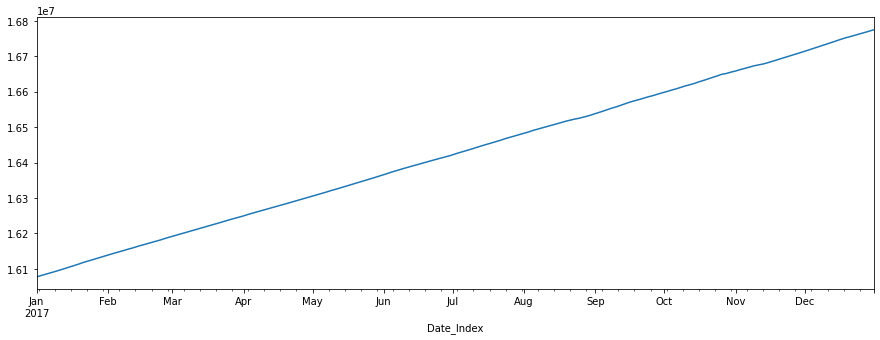

In [4]:
dataset['Bitcoins_in_circulation'].loc['2017'].plot().figure.set_size_inches(15, 5)

в) за квітень 2016 року;

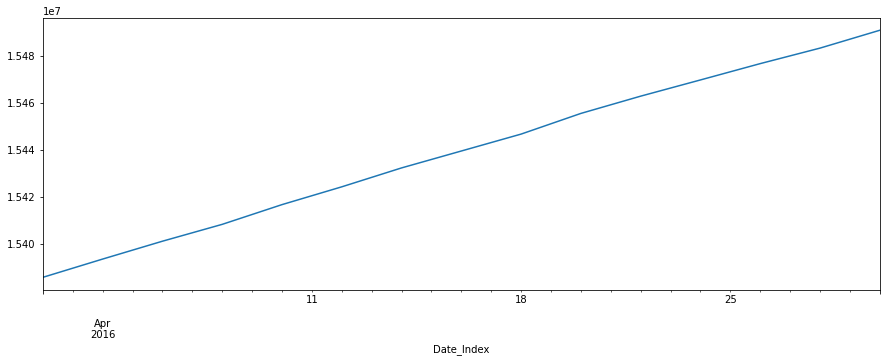

In [5]:
dataset['Bitcoins_in_circulation'].loc['2016-04'].plot().figure.set_size_inches(15, 5)

г) за лютий 2010 – грудень 2015;

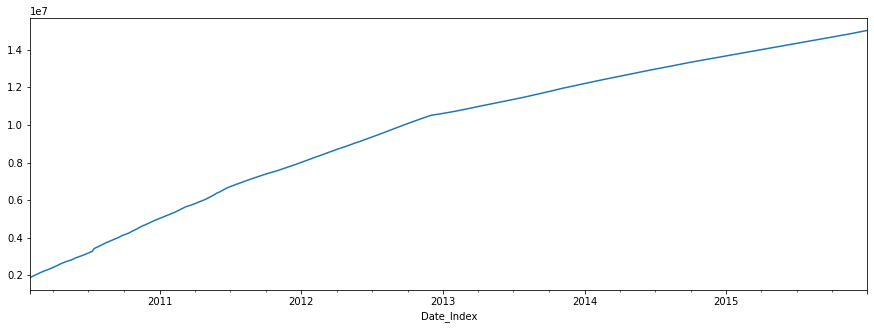

In [6]:
dataset['Bitcoins_in_circulation'].loc['2010-02':'2015-12'].plot().figure.set_size_inches(15, 5)

д) за 2011 та 2015 на одному графіку

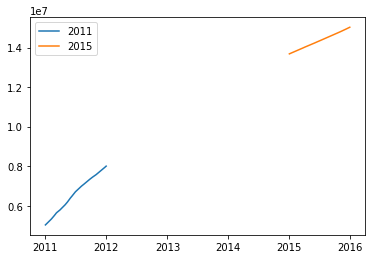

In [7]:
import matplotlib.pyplot as plt

# plt.plot(dataset.index, dataset['Bitcoins_in_circulation'].loc['2011'],  '-b',dataset.index,  dataset['Bitcoins_in_circulation'].loc['2015'], '-g')
# plt.legend(['2011','2015'])
#dataset['Bitcoins_in_circulation'].loc['2011'], dataset['Bitcoins_in_circulation'].loc['2015']
plt.plot(dataset['Bitcoins_in_circulation'].loc['2011'])
plt.plot(dataset['Bitcoins_in_circulation'].loc['2015'])
plt.legend(['2011', '2015'])
plt.show()

2. Знайти максимальні значення розміру блоку: а) за 2012 рік; б) за 
кожний рік; в) за кожний місяць 2017 року. г) Розрахувати і 
зобразити зміни значення розміру блоку у відсотках за кожні чотири 
дні впродовж осені 2015 року. д) Знайти та зобразити графічно 
ковзне середнє розміру блоку за 2016 рік з вікном в місяць.

In [8]:
# а)
dataset['BlockSize'].loc['2012'].max()

4255.0

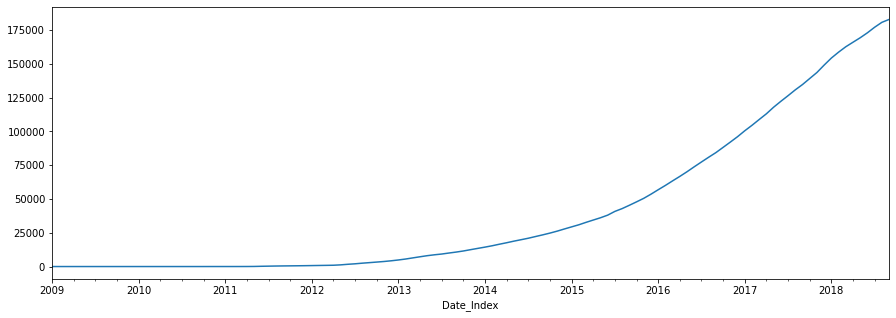

In [9]:
# б)
# dataset['BlockSize'].rolling(30).max().plot().figure.set_size_inches(15, 5)
dataset['BlockSize'].resample('M').max().plot().figure.set_size_inches(15, 5)


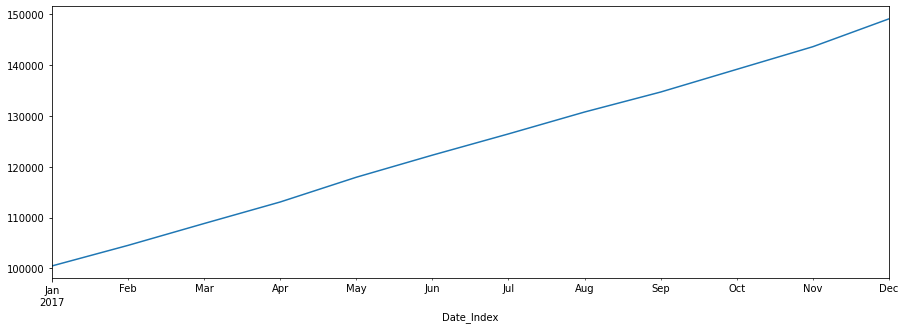

In [10]:
# в)
dataset['BlockSize'].loc['2017'].resample('M').max().plot().figure.set_size_inches(15, 5)

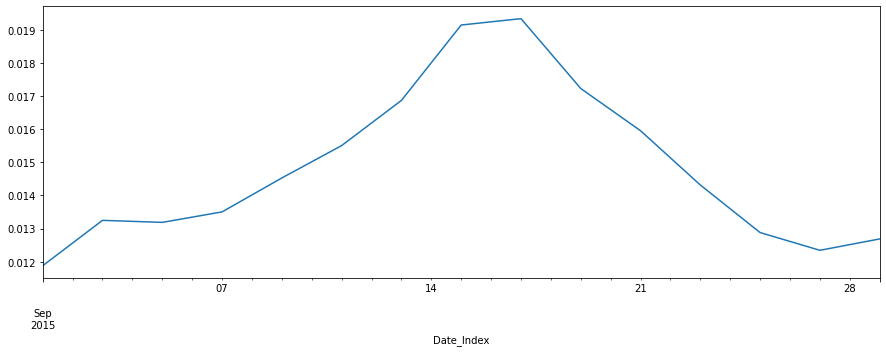

In [11]:
# г) зобразити зміни значення розміру блоку у відсотках за кожні чотири дні впродовж осені 2015 року.
# dataset['BlockSize'].loc['2015-09'].pct_change(periods=4).plot().figure.set_size_inches(15, 5)
# dataset['BlockSize'].loc['2015-09'].pct_change(periods=4)
(dataset['BlockSize'].loc['2015-08':'2015-09'].pct_change(periods=4)).loc['2015-09'].plot().figure.set_size_inches(15, 5)

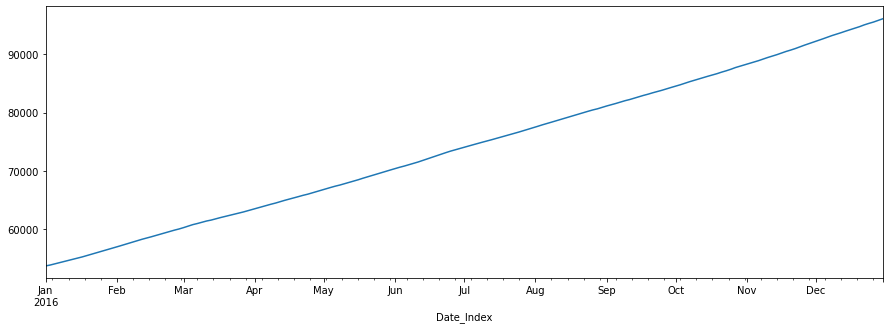

In [12]:
# д) Знайти та зобразити графічно ковзне середнє розміру блоку за 2016 рік з вікном в місяць.
dataset['BlockSize'].loc['2016'].rolling(30).mean().plot().figure.set_size_inches(15, 5)
# dataset['BlockSize'].loc['2016-01']
# (dataset['BlockSize'].loc['2016'].rolling(12).mean())[10]